In [25]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [26]:
train = pd.read_csv(r"/kaggle/input/train11/train.csv", header=0)
test = pd.read_csv(r"/kaggle/input/test111/validation.csv", header=0)

# Copy the data to back-up file

train_bk = train.copy()
test_bk = test.copy()

# Display first 5 records

train.head()
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [28]:
# Display the shape of the dataset

train.shape

(381109, 12)

In [29]:
# Display missing values in variable

train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [30]:
# Display unique values of variables

train.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [31]:
train.drop("id", inplace=True, axis=1)
test.drop("id",inplace=True, axis=1)

In [32]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [33]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [34]:
train['Gender']=train['Gender'].replace({'Male':1,'Female':0})
train.head()

test['Gender']=test['Gender'].replace({'Male':1,'Female':0})
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,1,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,1,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,1,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,1,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [35]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [36]:
train['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace=True)
train['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)

test['Vehicle_Damage'].replace({'Yes':1,'No':0}, inplace=True)
test['Vehicle_Age'].replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)

In [37]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [38]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,1,40,1,28.0,0,2,1,33762.0,7.0,111
2,1,47,1,28.0,0,2,1,40050.0,124.0,199
3,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,1,27,1,28.0,1,1,0,59097.0,152.0,297


In [39]:
train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [40]:
IndepVar = []
for col in train.columns:
    if col != 'Response':
        IndepVar.append(col)

TargetVar = 'Response'

x = train[IndepVar]
y = train[TargetVar]

In [41]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((266776, 10), (114333, 10), (266776,), (114333,))

In [42]:
x

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,3,1,40454.0,26.0,217
1,1,76,1,3.0,0,2,0,33536.0,26.0,183
2,1,47,1,28.0,0,3,1,38294.0,26.0,27
3,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,0,29,1,41.0,1,1,0,27496.0,152.0,39
...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,2,0,30170.0,26.0,88
381105,1,30,1,37.0,1,1,0,40016.0,152.0,131
381106,1,21,1,30.0,1,1,0,35118.0,160.0,161
381107,0,68,1,14.0,0,3,1,44617.0,124.0,74


In [43]:
y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [44]:
cols1=['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']

In [45]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols1] = mmscaler.fit_transform(x_train[cols1])
x_train = pd.DataFrame(x_train)

x_test[cols1] = mmscaler.fit_transform(x_test[cols1])
x_test = pd.DataFrame(x_test)

In [46]:
IndepVar = []
for col in test.columns:
    if col != 'Response':
        IndepVar.append(col)

TargetVar = 'Response'

xtest = test[IndepVar]

In [47]:
Results = pd.read_csv(r"/kaggle/input/results/HTResults.csv", header=0)
Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[    26  14112]
 [    24 100171]]
Outcome values : 
 26 14112 24 100171
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.00      0.00     14138
           0       0.88      1.00      0.93    100195

    accuracy                           0.88    114333
   macro avg       0.70      0.50      0.47    114333
weighted avg       0.83      0.88      0.82    114333

Accuracy : 87.6 %
Precision : 52.0 %
Recall : 0.2 %
F1 Score : 0.004
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.1 %
MCC : 0.025
roc_auc_score: 0.501


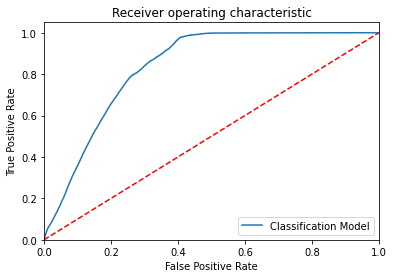

Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 4310  9828]
 [10443 89752]]
Outcome values : 
 4310 9828 10443 89752
Classification report : 
               precision    recall  f1-score   support

           1       0.29      0.30      0.30     14138
           0       0.90      0.90      0.90    100195

    accuracy                           0.82    114333
   macro avg       0.60      0.60      0.60    114333
weighted avg       0.83      0.82      0.82    114333

Accuracy : 82.3 %
Precision : 29.2 %
Recall : 30.5 %
F1 Score : 0.298
Specificity or True Negative Rate : 89.6 %
Balanced Accuracy : 60.0 %
MCC : 0.197
roc_auc_score: 0.6


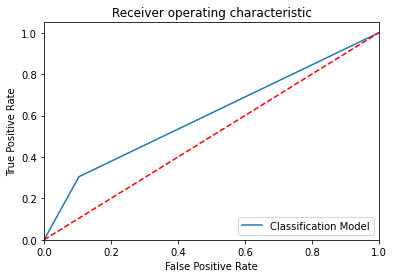

Model Name:  RandomForestClassifier(max_features='sqrt')
Confusion matrix : 
 [[ 1682 12456]
 [ 2873 97322]]
Outcome values : 
 1682 12456 2873 97322
Classification report : 
               precision    recall  f1-score   support

           1       0.37      0.12      0.18     14138
           0       0.89      0.97      0.93    100195

    accuracy                           0.87    114333
   macro avg       0.63      0.55      0.55    114333
weighted avg       0.82      0.87      0.83    114333

Accuracy : 86.6 %
Precision : 36.9 %
Recall : 11.9 %
F1 Score : 0.18
Specificity or True Negative Rate : 97.1 %
Balanced Accuracy : 54.5 %
MCC : 0.152
roc_auc_score: 0.545


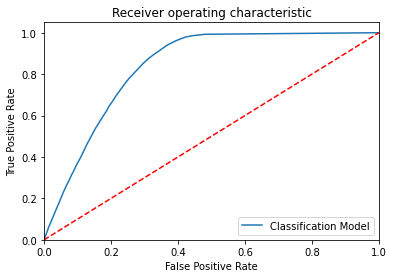

Model Name:  ExtraTreesClassifier(max_features='sqrt')
Confusion matrix : 
 [[ 2160 11978]
 [ 3955 96240]]
Outcome values : 
 2160 11978 3955 96240
Classification report : 
               precision    recall  f1-score   support

           1       0.35      0.15      0.21     14138
           0       0.89      0.96      0.92    100195

    accuracy                           0.86    114333
   macro avg       0.62      0.56      0.57    114333
weighted avg       0.82      0.86      0.84    114333

Accuracy : 86.1 %
Precision : 35.3 %
Recall : 15.3 %
F1 Score : 0.213
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 55.7 %
MCC : 0.166
roc_auc_score: 0.557


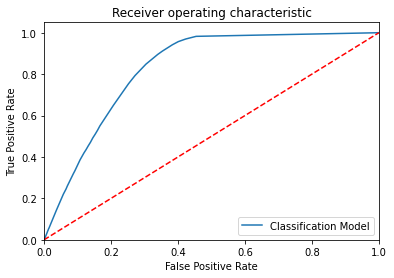

Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 2446 11692]
 [ 4790 95405]]
Outcome values : 
 2446 11692 4790 95405
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.17      0.23     14138
           0       0.89      0.95      0.92    100195

    accuracy                           0.86    114333
   macro avg       0.61      0.56      0.57    114333
weighted avg       0.82      0.86      0.83    114333

Accuracy : 85.6 %
Precision : 33.8 %
Recall : 17.3 %
F1 Score : 0.229
Specificity or True Negative Rate : 95.2 %
Balanced Accuracy : 56.2 %
MCC : 0.169
roc_auc_score: 0.563


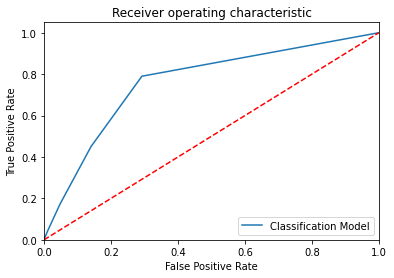

Model Name:  GaussianNB()
Confusion matrix : 
 [[13808   330]
 [40633 59562]]
Outcome values : 
 13808 330 40633 59562
Classification report : 
               precision    recall  f1-score   support

           1       0.25      0.98      0.40     14138
           0       0.99      0.59      0.74    100195

    accuracy                           0.64    114333
   macro avg       0.62      0.79      0.57    114333
weighted avg       0.90      0.64      0.70    114333

Accuracy : 64.2 %
Precision : 25.4 %
Recall : 97.7 %
F1 Score : 0.403
Specificity or True Negative Rate : 59.4 %
Balanced Accuracy : 78.6 %
MCC : 0.376
roc_auc_score: 0.786


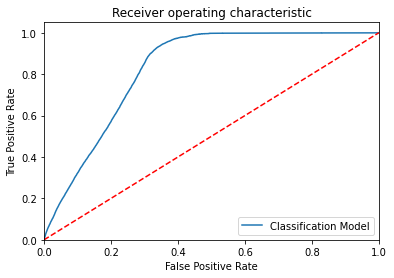

Model Name:  HistGradientBoostingClassifier(loss='binary_crossentropy')
Confusion matrix : 
 [[    40  14098]
 [    52 100143]]
Outcome values : 
 40 14098 52 100143
Classification report : 
               precision    recall  f1-score   support

           1       0.43      0.00      0.01     14138
           0       0.88      1.00      0.93    100195

    accuracy                           0.88    114333
   macro avg       0.66      0.50      0.47    114333
weighted avg       0.82      0.88      0.82    114333

Accuracy : 87.6 %
Precision : 43.5 %
Recall : 0.3 %
F1 Score : 0.006
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.1 %
MCC : 0.027
roc_auc_score: 0.501


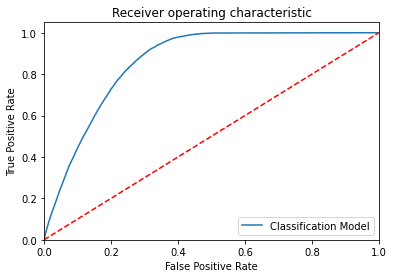

Model Name:  LGBMClassifier()
Confusion matrix : 
 [[    39  14099]
 [    76 100119]]
Outcome values : 
 39 14099 76 100119
Classification report : 
               precision    recall  f1-score   support

           1       0.34      0.00      0.01     14138
           0       0.88      1.00      0.93    100195

    accuracy                           0.88    114333
   macro avg       0.61      0.50      0.47    114333
weighted avg       0.81      0.88      0.82    114333

Accuracy : 87.6 %
Precision : 33.9 %
Recall : 0.3 %
F1 Score : 0.005
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.1 %
MCC : 0.021
roc_auc_score: 0.501


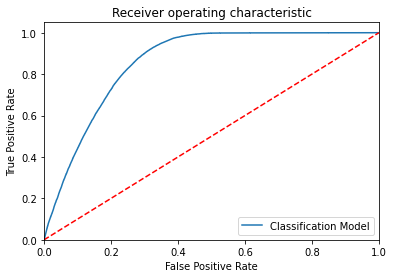

Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 1817 12321]
 [ 3210 96985]]
Outcome values : 
 1817 12321 3210 96985
Classification report : 
               precision    recall  f1-score   support

           1       0.36      0.13      0.19     14138
           0       0.89      0.97      0.93    100195

    accuracy                           0.86    114333
   macro avg       0.62      0.55      0.56    114333
weighted avg       0.82      0.86      0.83    114333

Accuracy : 86.4 %
Precision : 36.1 %
Recall : 12.9 %
F1 Score : 0.19
Specificity or True Negative Rate : 96.8 %
Balanced Accuracy : 54.8 %
MCC : 0.155
roc_auc_score: 0.548


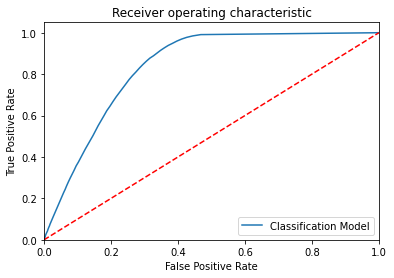

Model Name:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Confusion matrix : 
 [[    74  14064]
 [    50 100145]]
Outcome values : 
 74 14064 50 100145
Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.01      0.01     14138
           0       0.88      1.00      

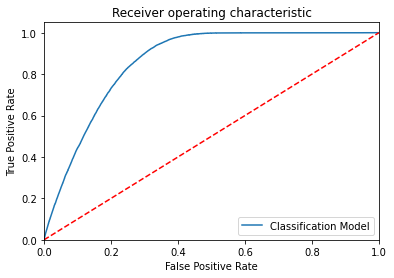

In [48]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Create objects of classification algorithm with default hyper-parameters
    
ModelLR = LogisticRegression()

ModelDC = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features=None,
                                 max_leaf_nodes=None, min_impurity_decrease=0.0,min_samples_leaf=1, 
                                 min_samples_split=2,min_weight_fraction_leaf=0.0,random_state=None, splitter='best')

ModelRF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                                 max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                 ccp_alpha=0.0, max_samples=None)

ModelET = ExtraTreesClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
                               max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                               n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)

ModelKNN = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, 
                                p=2, metric='minkowski', metric_params=None, n_jobs=None)

ModelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

ModelLGB = lgb.LGBMClassifier()

ModelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = HistGradientBoostingClassifier(loss='binary_crossentropy', learning_rate=0.1, max_iter=100, max_leaf_nodes=31, 
                                          max_depth=None, min_samples_leaf=20, l2_regularization=0.0, max_bins=255, 
                                          categorical_features=None, monotonic_cst=None, warm_start=False, early_stopping='auto', 
                                          scoring='loss', validation_fraction=0.1, n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None)

ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelGB, ModelLGB, ModelBAG, ModelXGB]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn,
               'False_Positive': fp,
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)


In [49]:
Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),26,14112,24,100171,0.876,0.520,0.002,0.004,1.000,0.025,0.500800,0.501
1,DecisionTreeClassifier(),4310,9828,10443,89752,0.823,0.292,0.305,0.298,0.896,0.197,0.600313,0.600
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1682,12456,2873,97322,0.866,0.369,0.119,0.180,0.971,0.152,0.545148,0.545
3,"(ExtraTreeClassifier(max_features='sqrt', rand...",2160,11978,3955,96240,0.861,0.353,0.153,0.213,0.961,0.166,0.556653,0.557
4,KNeighborsClassifier(),2446,11692,4790,95405,0.856,0.338,0.173,0.229,0.952,0.169,0.562601,0.562
5,GaussianNB(),13808,330,40633,59562,0.642,0.254,0.977,0.403,0.594,0.376,0.785560,0.786
6,HistGradientBoostingClassifier(loss='binary_cr...,40,14098,52,100143,0.876,0.435,0.003,0.006,0.999,0.027,0.501155,0.501
7,LGBMClassifier(),39,14099,76,100119,0.876,0.339,0.003,0.005,0.999,0.021,0.501000,0.501
8,(DecisionTreeClassifier(random_state=188604719...,1817,12321,3210,96985,0.864,0.361,0.129,0.190,0.968,0.155,0.548241,0.548
9,"XGBClassifier(base_score=0.5, booster='gbtree'...",74,14064,50,100145,0.877,0.597,0.005,0.010,1.000,0.047,0.502368,0.502
